# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

### 로지스틱 함수
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

In [92]:
from scipy.special import expit
import math

# 오차함수
def sigmoid_erf(X : np.ndarray):
    new_X = []
    for x in X:
        new_X.append(.5 + math.erf(x) / 2)
    return np.array(new_X)

# tanh 시그모이드
def sigmoid_tanh(X):
    return .5 + np.tanh(X)/2

# 로지스틱 시그모이드
def sigmoid_logistic(X):
    return 1 / (1 + np.exp(-X))

# 아크탄젠트 시그모이드
def sigmoid_arctan(X : np.ndarray):
    new_X = []
    for x in X:
        new_x = 2 / math.pi * math.atan( math.pi / 2 * x )
        new_X.append(0.5 + new_x / 2)
    return np.array(new_X)

# x / 1 + |x|
def sigmoid_abs(X):
    return .5 + (X / (1 + np.abs(X)))/2

# x / root (1 + x^2)
def sigmoid_sqrt(X):
    return .5 + (X / np.sqrt(1 + np.power(X, 2)))/2
    


sig_f = [sigmoid_erf, sigmoid_tanh, sigmoid_logistic, sigmoid_arctan, sigmoid_abs, sigmoid_sqrt]

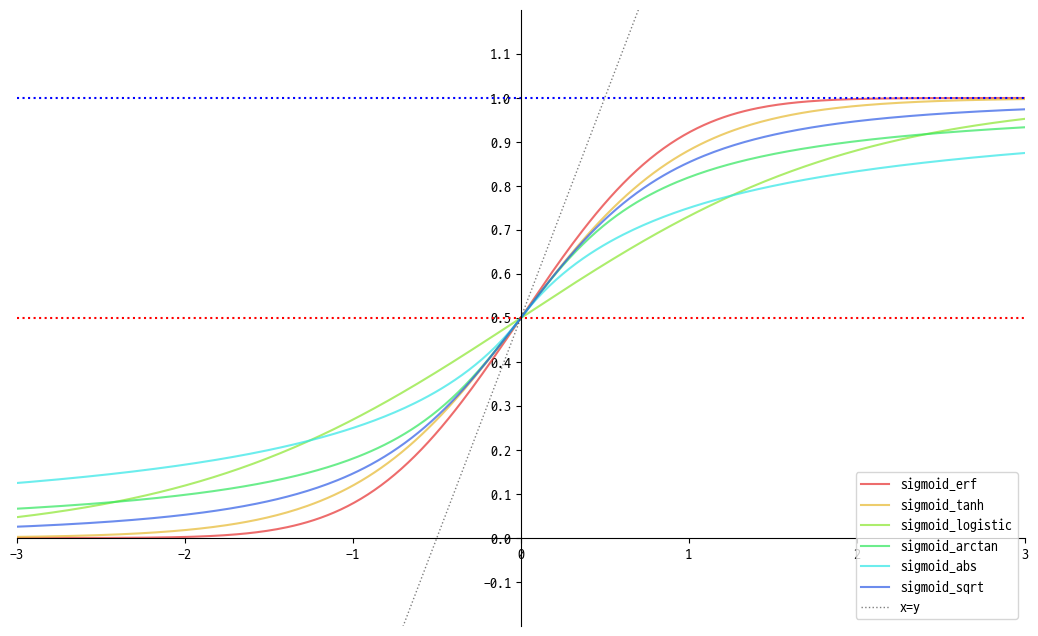

In [93]:
from test_color.color_list import rand_hex_list_hsv
colors = rand_hex_list_hsv(len(sig_f)+2, s=0.8, v=0.9)

plt.figure(figsize=(13, 8))

for i, f in enumerate(sig_f):
    plt.plot(X, f(X), label=f.__name__, color=colors[i], alpha=0.7)

plt.axhline(y=0.5, color='r', linestyle=':')
plt.axhline(y=1.0, color='b', linestyle=':')
plt.plot(X, X+.5, label='x=y', color='black', linestyle=':', alpha=0.5, linewidth=1.)

plt.ylim(-0.2, 1.2)
plt.yticks(np.arange(-0.1,1.2,0.1))

plt.xlim(-3, 3)

plt.legend()

ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0.0))
# ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [108]:
import numpy as np
print(f'완벽한 정답 : {np.log(1)}')
print(f'완벽한 오답 : {np.log(0)}')

완벽한 정답 : 0.0
완벽한 오답 : -inf


C:\Users\hyenz\AppData\Local\Temp\ipykernel_12828\393777374.py:3: RuntimeWarning: divide by zero encountered in log
  print(f'완벽한 오답 : {np.log(0)}')


In [136]:
X = np.linspace(0.001, 0.999, 1000)
y = -np.log(X)
y_ = -np.log(1-X)

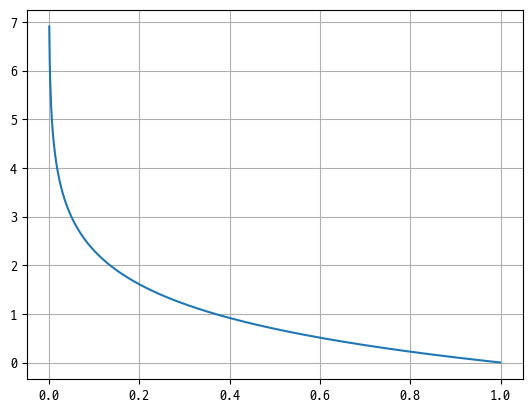

In [138]:
plt.plot(X, y)
# plt.plot(1-X, y_)
plt.grid()
# 지수함수의 특성상 0에 가까워질수록 무한대로 발산한다.

In [125]:
np.log(.5), np.log(.7), np.log(.9)
# 정답일 떄 로그값은 0에 가까워지고

(-0.6931471805599453, -0.35667494393873245, -0.10536051565782628)

In [126]:
np.log(0.5), np.log(0.3), np.log(0.1)
# 오답일 때 로그값은 무한대로 발산한다.

(-0.6931471805599453, -1.2039728043259361, -2.3025850929940455)

In [35]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 손실 함수(Loss Function)
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- **Binary Cross Entropy**
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

## 예제

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.